@@@@@@@@@@@@@@@@@@@@@@@@@@@  <br>  CRR Model  <br>   @@@@@@@@@@@@@@@@@@@@@@@@@@@

In [1]:
############ CRR model--European option

import numpy as np

def CRREuropeanOption(S0, E, T, N, r, sigma, cp):
    ## for call: cp = 1
    ## for put: cp = -1
    
    ## defining delta_t, parameters U, D, R and risk-neutral probability q
    ## Here we use CRR parameters for U and D
    dt = T/N
    U = np.exp(sigma*np.sqrt(dt))
    D = np.exp(-sigma*np.sqrt(dt))
    R = (np.exp(r*dt))
    q = (R - D)/(U - D)
    
    ## initializing two N+1 dimensional vectors with zeros to store option prices
    V_old = np.zeros(N+1)
    V_new = np.zeros(N+1)
    
    for m in range(0, N+1):  
        V_old[m] = np.maximum(cp*(S0*U**m*D**(N-m) - E), 0)
        ## first cycle - Computing the prices of the option (depending on the price S(T) = S0*U**D**(N-m)
        ## at time T = N*dt (see formula V(N,m) for PUT option). The prices of the option at time T 
        ## equal the payments at time T
        
    for j in range(N-1, -1, -1):
        ## cycle for formula V(j,m), j = N-1, N-2,...,0  
        for m in range(0, j+1):
            V_new[m] = (q*V_old[m+1] + (1-q)*V_old[m])/R
            ## computing the option prices at time j*dt if we know the prices at time (j+1)*dt. 
            ## (see formula for V(j,m))
            
        for m in range(0, j+1):
            V_old[m] = V_new[m]
            ## after that the all option prices at time j*dt are known, we consider these prices as old prices. 
    return(V_new[0])
    ## V_new[0] is the option price at t=0
      
print('%8.4f' % CRREuropeanOption(S0=100, E=110, T=1, N=1000, r=.05, sigma=.3, cp=1)) 
# should be 10.0173
print('%8.4f' % CRREuropeanOption(S0=100, E=110, T=1, N=1000, r=.05, sigma=.3, cp=-1)) 
# should be 14.6526

 10.0173
 14.6526


In [2]:
############ CRR model--American option

import numpy as np

def CRRAmericanOption(S0, E, T, N, r, sigma, cp):
    ## for call: cp = 1
    ## for put: cp = -1
    
    ## defining delta_t, parameters U, D, R and risk-neutral probability q
    ## Here we use CRR parameters for U and D
    dt = T/N
    U = np.exp(sigma*np.sqrt(dt))
    D = np.exp(-sigma*np.sqrt(dt))
    R = (np.exp(r*dt))
    q = (R - D)/(U - D)
    
    ## initializing two N+1 dimensional vectors with zeros to store option prices
    V_old = np.zeros(N+1)
    V_new = np.zeros(N+1)
    
    for m in range(0, N+1):  
        V_old[m] = np.maximum(cp*(S0*U**m*D**(N-m) - E), 0)
        ## first cycle - Computing the prices of the option (depending on the price S(T) = S0*U**D**(N-m)
        ## at time T = N*dt (see formula V(N,m) for PUT option). The prices of the option at time T 
        ## equal the payments at time T
        
    for j in range(N-1, -1, -1):
        ## cycle for formula V(j,m), j = N-1, N-2,...,0  
        for m in range(0, j+1):
            V_new[m] = (q*V_old[m+1] + (1-q)*V_old[m])/R
            V_new[m] = np.maximum(V_new[m], np.maximum(cp*(S0*U**m*D**(j-m) - E), 0))
            ## computing the option prices at time j*dt if we know the prices at time (j+1)*dt. 
            ## (see formula for V(j,m))
            
        for m in range(0, j+1):
            V_old[m] = V_new[m]
            ## after that the all option prices at time j*dt are known, we consider these prices as old prices. 
    return(V_new[0])
    ## V_new[0] is the option price at t=0
      
print('%8.4f' % CRRAmericanOption(S0=100, E=110, T=1, N=1000, r=.05, sigma=.3, cp=1)) 
# should be 10.0173
print('%8.4f' % CRRAmericanOption(S0=100, E=110, T=1, N=1000, r=.1, sigma=.4, cp=-1)) 
# should be 17.5045

 10.0173
 17.5045


@@@@@@@@@@@@@@@@@@@@@@@@@@@  <br>  Black-Scholes Model  <br>   @@@@@@@@@@@@@@@@@@@@@@@@@@@

In [3]:
## Black-Scholes

import numpy as np
from scipy.stats import norm

S0 = 100
E = 110
T = 1
r = .05
sigma = .3
N = 1000
d1 = (np.log(S0/E) + (r + .5*sigma**2)*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
Vcall = S0*norm.cdf(d1) - E*np.exp(-r*T)*norm.cdf(d2)

def BlackScholesEuropeanCall(S0, E, T, N, r, sigma):
    d1 = (np.log(S0/E) + (r + .5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S0*norm.cdf(d1) - E*np.exp(-r*T)*norm.cdf(d2)

def BlackScholesEuropeanPut(S0, E, T, N, r, sigma):
    d1 = (np.log(S0/E) + (r + .5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return E*np.exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)

print("Black-Scholes test")
print(BlackScholesEuropeanCall(S0, E, T, N, r, sigma))
# 10.02007762005595
print(BlackScholesEuropeanPut(S0, E, T, N, r, sigma))
# 14.655314315134518

Black-Scholes test
10.02007762005595
14.655314315134518


@@@@@@@@@@@@@@@@@@@@@@@@@@@  <br>  Jarrow-Rudd Model  <br>   @@@@@@@@@@@@@@@@@@@@@@@@@@@

In [4]:
############ Jarrow-Rudd model--European option

import numpy as np

def JREuropeanOption(S0, E, T, N, r, sigma, cp):
    ## for call: cp = 1
    ## for put: cp = -1
    
    ## defining delta_t, parameters U, D, R and risk-neutral probability q
    ## Here we use Jarrow-Rudd parameters for U and D
    dt = T/N
    rho = r - .5*sigma**2
    U = np.exp(rho*dt + sigma*np.sqrt(dt))
    D = np.exp(rho*dt - sigma*np.sqrt(dt))
    R = (np.exp(r*dt))
    q = (R - D)/(U - D)
    
    ## initializing two N+1 dimensional vectors with zeros to store option prices
    V_old = np.zeros(N+1)
    V_new = np.zeros(N+1)
    
    for m in range(0, N+1):  
        V_old[m] = np.maximum(cp*(S0*U**m*D**(N-m) - E), 0)
        ## first cycle - Computing the prices of the option (depending on the price S(T) = S0*U**D**(N-m)
        ## at time T = N*dt (see formula V(N,m) for PUT option). The prices of the option at time T 
        ## equal the payments at time T
        
    for j in range(N-1, -1, -1):
        ## cycle for formula V(j,m), j = N-1, N-2,...,0  
        for m in range(0, j+1):
            V_new[m] = (q*V_old[m+1] + (1-q)*V_old[m])/R
            ## computing the option prices at time j*dt if we know the prices at time (j+1)*dt. 
            ## (see formula for V(j,m))
            
        for m in range(0, j+1):
            V_old[m] = V_new[m]
            ## after that the all option prices at time j*dt are known, we consider these prices as old prices. 
    return(V_new[0])
    ## V_new[0] is the option price at t=0
      
print('%8.4f' % JREuropeanOption(S0=100, E=110, T=1, N=1000, r=.05, sigma=.3, cp=1)) 
# 10.0212
print('%8.4f' % JREuropeanOption(S0=100, E=110, T=1, N=1000, r=.05, sigma=.3, cp=-1)) 
# 14.6564

 10.0212
 14.6564


In [5]:
############ Jarrow-Rudd model--American option

import numpy as np

def JRAmericanOption(S0, E, T, N, r, sigma, cp):
    ## for call: cp = 1
    ## for put: cp = -1
    
    ## defining delta_t, parameters U, D, R and risk-neutral probability q
    ## Here we use Jarrow-Rudd parameters for U and D
    dt = T/N
    rho = r - .5*sigma**2
    U = np.exp(rho*dt + sigma*np.sqrt(dt))
    D = np.exp(rho*dt - sigma*np.sqrt(dt))
    R = (np.exp(r*dt))
    q = (R - D)/(U - D)
    
    ## initializing two N+1 dimensional vectors with zeros to store option prices
    V_old = np.zeros(N+1)
    V_new = np.zeros(N+1)
    
    for m in range(0, N+1):  
        V_old[m] = np.maximum(cp*(S0*U**m*D**(N-m) - E), 0)
        ## first cycle - Computing the prices of the option (depending on the price S(T) = S0*U**D**(N-m)
        ## at time T = N*dt (see formula V(N,m) for PUT option). The prices of the option at time T 
        ## equal the payments at time T
        
    for j in range(N-1, -1, -1):
        ## cycle for formula V(j,m), j = N-1, N-2,...,0  
        for m in range(0, j+1):
            V_new[m] = (q*V_old[m+1] + (1-q)*V_old[m])/R
            V_new[m] = np.maximum(V_new[m], np.maximum(cp*(S0*U**m*D**(j-m) - E), 0))
            ## computing the option prices at time j*dt if we know the prices at time (j+1)*dt. 
            ## (see formula for V(j,m))
            
        for m in range(0, j+1):
            V_old[m] = V_new[m]
            ## after that the all option prices at time j*dt are known, we consider these prices as old prices. 
    return(V_new[0])
    ## V_new[0] is the option price at t=0
      
print('%8.4f' % JRAmericanOption(S0=100, E=110, T=1, N=1000, r=.05, sigma=.3, cp=1)) 
# should be 10.0212
print('%8.4f' % JRAmericanOption(S0=100, E=110, T=1, N=1000, r=.1, sigma=.4, cp=-1)) 
# should be 17.5021

 10.0212
 17.5021


@@@@@@@@@@@@@@@@@@@@@@@@@@@  <br>  Leisen-Reimer Model  <br>   @@@@@@@@@@@@@@@@@@@@@@@@@@@

In [6]:
############ Leisen-Reimer model--European option

import numpy as np

def LREuropeanOption(S0, E, T, N, r, sigma, cp):
    ## for call: cp = 1
    ## for put: cp = -1
    
    if N % 2 == 0:
        N = N + 1
    
    def a(z):
        return z**2*(N + 1/6)*(N + 1/3 + .1/(N + 1))**(-2)

    def h(z):
        return .5 + .5*np.sign(z)*(1 - np.exp(-a(z)))**.5
    
    
    ## defining delta_t, parameters U, D, R and risk-neutral probability q
    ## Here we use Jarrow-Rudd parameters for U and D
    dt = T/N
    d1 = (np.log(S0/E) + (r + .5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    q_prime = h(d1)
    q = h(d2)    
    R = (np.exp(r*dt))
    U = R*q_prime/q
    D = (R - q*U)/(1 - q)
    
    ## initializing two N+1 dimensional vectors with zeros to store option prices
    V_old = np.zeros(N+1)
    V_new = np.zeros(N+1)
    
    for m in range(0, N+1):  
        V_old[m] = np.maximum(cp*(S0*U**m*D**(N-m) - E), 0)
        ## first cycle - Computing the prices of the option (depending on the price S(T) = S0*U**D**(N-m)
        ## at time T = N*dt (see formula V(N,m) for PUT option). The prices of the option at time T 
        ## equal the payments at time T
        
    for j in range(N-1, -1, -1):
        ## cycle for formula V(j,m), j = N-1, N-2,...,0  
        for m in range(0, j+1):
            V_new[m] = (q*V_old[m+1] + (1-q)*V_old[m])/R
            ## computing the option prices at time j*dt if we know the prices at time (j+1)*dt. 
            ## (see formula for V(j,m))
            
        for m in range(0, j+1):
            V_old[m] = V_new[m]
            ## after that the all option prices at time j*dt are known, we consider these prices as old prices. 
    return(V_new[0])
    ## V_new[0] is the option price at t=0
      
print('%8.4f' % LREuropeanOption(S0=100, E=110, T=1, N=1001, r=.05, sigma=.3, cp=1)) 
# 10.0201
print('%8.4f' % LREuropeanOption(S0=100, E=110, T=1, N=1001, r=.05, sigma=.3, cp=-1)) 
# 14.6553

 10.0201
 14.6553


In [7]:
############ Leisen-Reimer model--American option

import numpy as np

def LRAmericanOption(S0, E, T, N, r, sigma, cp):
    ## for call: cp = 1
    ## for put: cp = -1
    
    if N % 2 == 0:
        N = N + 1
    
    def a(z):
        return z**2*(N + 1/6)*(N + 1/3 + .1/(N + 1))**(-2)

    def h(z):
        return .5 + .5*np.sign(z)*(1 - np.exp(-a(z)))**.5
    
    ## defining delta_t, parameters U, D, R and risk-neutral probability q
    ## Here we use Leisen-Reimer parameters for U and D
    dt = T/N
    d1 = (np.log(S0/E) + (r + .5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    q_prime = h(d1)
    q = h(d2)    
    R = (np.exp(r*dt))
    U = R*q_prime/q
    D = (R - q*U)/(1 - q)
    
    ## initializing two N+1 dimensional vectors with zeros to store option prices
    V_old = np.zeros(N+1)
    V_new = np.zeros(N+1)
    
    for m in range(0, N+1):  
        V_old[m] = np.maximum(cp*(S0*U**m*D**(N-m) - E), 0)
        ## first cycle - Computing the prices of the option (depending on the price S(T) = S0*U**D**(N-m)
        ## at time T = N*dt (see formula V(N,m) for PUT option). The prices of the option at time T 
        ## equal the payments at time T
        
    for j in range(N-1, -1, -1):
        ## cycle for formula V(j,m), j = N-1, N-2,...,0  
        for m in range(0, j+1):
            V_new[m] = (q*V_old[m+1] + (1-q)*V_old[m])/R
            V_new[m] = np.maximum(V_new[m], np.maximum(cp*(S0*U**m*D**(j-m) - E), 0))
            ## computing the option prices at time j*dt if we know the prices at time (j+1)*dt. 
            ## (see formula for V(j,m))
            
        for m in range(0, j+1):
            V_old[m] = V_new[m]
            ## after that the all option prices at time j*dt are known, we consider these prices as old prices. 
    return(V_new[0])
    ## V_new[0] is the option price at t=0
      
print('%8.4f' % LRAmericanOption(S0=100, E=110, T=1, N=1000, r=.05, sigma=.3, cp=1)) 
# should be 10.0201
print('%8.4f' % LRAmericanOption(S0=100, E=110, T=1, N=1000, r=.1, sigma=.4, cp=-1)) 
# should be 17.5019

 10.0201
 17.5019


@@@@@@@@@@@@@@@@@@@@@@@@@@@  <br>  Answers to homework  <br>   @@@@@@@@@@@@@@@@@@@@@@@@@@@

In [8]:
import numpy as np
from scipy.stats import norm

T = 2
S0 = 100
sigma = np.sqrt(.15)
r_put = .03
r_call = -.02

#### my parameters
## Call option
E = 104 
r = r_call

def BlackScholesEuropeanCall(S0, E, T, N, r, sigma):
    d1 = (np.log(S0/E) + (r + .5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S0*norm.cdf(d1) - E*np.exp(-r*T)*norm.cdf(d2)

print("Black-Scholes Euro call E=104 and interest rate r=-2%:", BlackScholesEuropeanCall(S0, E, T, N, r, sigma))
# 18.57698772820205

N = 300
print("CRR Euro call E=104, N=300 and interest rate r=-2%:", CRREuropeanOption(S0, E, T, N, r, sigma, cp=1))
# 18.592495726140772
print("CRR American call E=104, N=300 and interest rate r=-2%:", CRRAmericanOption(S0, E, T, N, r, sigma, cp=1))
# 18.76160691409109
print("Jarrow-Rudd Euro call E=104, N=300 and interest rate r=-2%:", JREuropeanOption(S0, E, T, N, r, sigma, cp=1))
# 18.58862759360032
print("Jarrow-Rudd American call E=104, N=300 and interest rate r=-2%:", JRAmericanOption(S0, E, T, N, r, sigma, cp=1))
# 18.75694231786369
print("Leisen-Reimer Euro call E=104, N=300 and interest rate r=-2%:", LREuropeanOption(S0, E, T, N, r, sigma, cp=1))
# 18.576976184808522
print("Leisen-Reimer American call E=104, N=300 and interest rate r=-2%:", LRAmericanOption(S0, E, T, N, r, sigma, cp=1))
# 18.745688756333866

N = 400
print("CRR Euro call E=104, N=400 and interest rate r=-2%:", CRREuropeanOption(S0, E, T, N, r, sigma, cp=1))
# 18.585133425139624
print("CRR American call E=104, N=400 and interest rate r=-2%:", CRRAmericanOption(S0, E, T, N, r, sigma, cp=1))
# 18.754182652448197
print("Jarrow-Rudd Euro call E=104, N=400 and interest rate r=-2%:", JREuropeanOption(S0, E, T, N, r, sigma, cp=1))
# 18.57654914111416
print("Jarrow-Rudd American call E=104, N=400 and interest rate r=-2%:", JRAmericanOption(S0, E, T, N, r, sigma, cp=1))
# 18.74438936794985
print("Leisen-Reimer Euro call E=104, N=400 and interest rate r=-2%:", LREuropeanOption(S0, E, T, N, r, sigma, cp=1))
# 18.57698121571073
print("Leisen-Reimer American call E=104, N=400 and interest rate r=-2%:", LRAmericanOption(S0, E, T, N, r, sigma, cp=1))
# 18.745271002279253

N = 500
print("CRR Euro call E=104, N=500 and interest rate r=-2%:", CRREuropeanOption(S0, E, T, N, r, sigma, cp=1))
# 18.57971741905266
print("CRR American call E=104, N=500 and interest rate r=-2%:", CRRAmericanOption(S0, E, T, N, r, sigma, cp=1))
# 18.748792481084433
print("Jarrow-Rudd Euro call E=104, N=500 and interest rate r=-2%:", JREuropeanOption(S0, E, T, N, r, sigma, cp=1))
# 18.582533773159653
print("Jarrow-Rudd American call E=104, N=500 and interest rate r=-2%:", JRAmericanOption(S0, E, T, N, r, sigma, cp=1))
# 18.750507189828166
print("Leisen-Reimer Euro call E=104, N=500 and interest rate r=-2%:", LREuropeanOption(S0, E, T, N, r, sigma, cp=1))
# 18.576983552753283
print("Leisen-Reimer American call E=104, N=500 and interest rate r=-2%:", LRAmericanOption(S0, E, T, N, r, sigma, cp=1))
# 18.745006851041918

Black-Scholes Euro call E=104 and interest rate r=-2%: 18.57698772820205
CRR Euro call E=104, N=300 and interest rate r=-2%: 18.592495726140772
CRR American call E=104, N=300 and interest rate r=-2%: 18.76160691409109
Jarrow-Rudd Euro call E=104, N=300 and interest rate r=-2%: 18.58862759360032
Jarrow-Rudd American call E=104, N=300 and interest rate r=-2%: 18.75694231786369
Leisen-Reimer Euro call E=104, N=300 and interest rate r=-2%: 18.576976184808522
Leisen-Reimer American call E=104, N=300 and interest rate r=-2%: 18.745688756333866
CRR Euro call E=104, N=400 and interest rate r=-2%: 18.585133425139624
CRR American call E=104, N=400 and interest rate r=-2%: 18.754182652448197
Jarrow-Rudd Euro call E=104, N=400 and interest rate r=-2%: 18.57654914111416
Jarrow-Rudd American call E=104, N=400 and interest rate r=-2%: 18.74438936794985
Leisen-Reimer Euro call E=104, N=400 and interest rate r=-2%: 18.57698121571073
Leisen-Reimer American call E=104, N=400 and interest rate r=-2%: 18.7

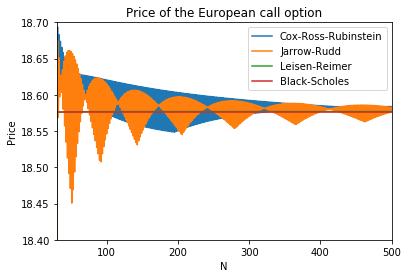

In [18]:
import matplotlib.pyplot as plt  

T = 2
S0 = 100
sigma = np.sqrt(.15)
r_put = .03
r_call = -.02

#### my parameters
## Call option
E = 104 
r = r_call

Vcall = BlackScholesEuropeanCall(S0, E, T, N, r, sigma)

V_CRR = np.zeros(501)
V_JR = np.zeros(501)
V_LR = np.zeros(501)
## initializing vector V with zeros to store option prices

Vc = Vcall*np.ones(501)
## Vc is vector, for which all elements equal to the Black-Scholes price.

for k in range(30, 501):
    V_CRR[k] = CRREuropeanOption(S0=S0, E=E, T=T, N=k, r=r, sigma=sigma, cp=1)
    V_JR[k] = JREuropeanOption(S0=S0, E=E, T=T, N=k, r=r, sigma=sigma, cp=1)
    V_LR[k] = LREuropeanOption(S0=S0, E=E, T=T, N=k, r=r, sigma=sigma, cp=1)
    
n = np.linspace(0, 500, 501)
# defining vector of x-values (number of the period)

plt.plot(n, V_CRR)
plt.plot(n, V_JR)
plt.plot(n, V_LR)
plt.plot(n, Vc) 
## definining the plot, the x-values are in vector n, y-values are in vector V

plt.xlim((30, 500))
## limits of x-axis

plt.ylim((18.4, 18.7))
## limits of y-axis (limits of option prices)

plt.ylabel('Price')
plt.xlabel('N')
plt.legend(['Cox-Ross-Rubinstein', 'Jarrow-Rudd', 'Leisen-Reimer', 'Black-Scholes'], loc='best')
plt.title('Price of the European call option')
plt.show()
## show plot

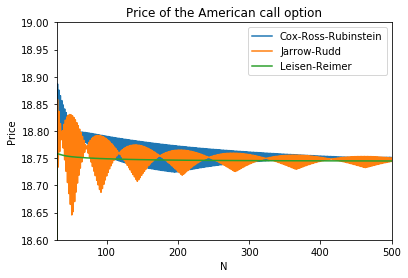

In [19]:
import matplotlib.pyplot as plt  

T = 2
S0 = 100
sigma = np.sqrt(.15)
r_put = .03
r_call = -.02

#### my parameters
## Call option
E = 104 
r = r_call

V_CRR = np.zeros(501)
V_JR = np.zeros(501)
V_LR = np.zeros(501)
## initializing vector V with zeros to store option prices

for k in range(30, 501):
    V_CRR[k] = CRRAmericanOption(S0=S0, E=E, T=T, N=k, r=r, sigma=sigma, cp=1)
    V_JR[k] = JRAmericanOption(S0=S0, E=E, T=T, N=k, r=r, sigma=sigma, cp=1)
    V_LR[k] = LRAmericanOption(S0=S0, E=E, T=T, N=k, r=r, sigma=sigma, cp=1)
    
n = np.linspace(0, 500, 501)
# defining vector of x-values (number of the period)

plt.plot(n, V_CRR)
plt.plot(n, V_JR)
plt.plot(n, V_LR)
 
## definining the plot, the x-values are in vector n, y-values are in vector V

plt.xlim((30, 500))
## limits of x-axis

plt.ylim((18.6, 19))
## limits of y-axis (limits of option prices)

plt.ylabel('Price')
plt.xlabel('N')
plt.legend(['Cox-Ross-Rubinstein', 'Jarrow-Rudd', 'Leisen-Reimer'], loc='best')
plt.title('Price of the American call option')
plt.show()
## show plot